In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,scale
from sklearn.cluster import KMeans

sheet_url = "https://docs.google.com/spreadsheets/d/1VzBbNYZF1gCm979OV8PDpnryTOTBs9RJ/edit#gid=1252243615"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
#print(url_1)
health_facility = pd.read_csv(url_1)
health_facility.head()

,Unnamed: 0,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.facility_type_other,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
0,0,0,William hospital,"60.234598, -90.157892",Southern,Pujehun,New York,Jasonfort,community_health_post,---,...,4,5,1,5,10.5,27,19.5,44,48.5,102.0
1,1,1,Kathryn Hospital/CHC,"21.2454855, -107.509120",Southern,Bo,Arizona,West Jamesshire,community_health_post,---,...,1.5,5,0,5,5.5,27,21,44,35.5,102.0
2,2,2,Jessica Hospital,"-0.178657, -9.190029",Southern,Bo,New Mexico,Robertsside,community_health_post,---,...,2,5,0,5,10,27,33.5,44,55.5,102.0
3,3,3,Lauren CHC,"35.856989, -87.512790",Southern,Bonthe,Missouri,Port Christopher,mch_post,---,...,4,5,2,5,12,27,34.5,44,57.5,102.0
4,4,4,Tammy CHC,"54.7148835, 150.744813",Southern,Bonthe,Virginia,Reneeton,community_health_post,---,...,4,5,3,5,12,27,29.5,44,55.0,102.0


In [2]:
health_facility.isnull().sum()

Unnamed: 0                                                                              0
number                                                                                  0
form.health_centre_information.facility_name                                            0
form.facility_gps                                                                       0
form.health_centre_information.location_information.region_province                     0
                                                                                       ..
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control    0
form.question1.score_logistics_patient_and_sample_transfer                              0
form.question1.score_max_logistics_patient_and_sample_transfer                          0
form.score_total                                                                        3
form.score_max_total                                                                    3
Length: 20

In [3]:
type(health_facility)

pandas.core.frame.DataFrame

<AxesSubplot:>

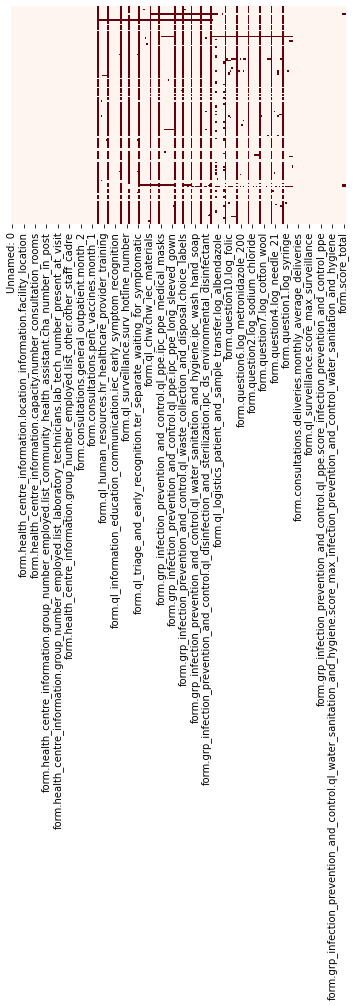

In [4]:
#Use heatmap & seaborn to check out missing data
sns.heatmap(health_facility.isnull(), yticklabels= False, cbar = False, cmap= 'Reds')

In [5]:
health_facility.isin(["---"]).sum()

Unnamed: 0                                                                               0
number                                                                                   0
form.health_centre_information.facility_name                                             2
form.facility_gps                                                                        0
form.health_centre_information.location_information.region_province                      2
                                                                                        ..
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control    18
form.question1.score_logistics_patient_and_sample_transfer                              20
form.question1.score_max_logistics_patient_and_sample_transfer                          20
form.score_total                                                                         0
form.score_max_total                                                                     0

In [6]:
# droped all columns and rows that were empty
health_facility = health_facility.dropna(how='all')
health_facility.head(2)

,Unnamed: 0,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.facility_type_other,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
0,0,0,William hospital,"60.234598, -90.157892",Southern,Pujehun,New York,Jasonfort,community_health_post,---,...,4,5,1,5,10.5,27,19.5,44,48.5,102.0
1,1,1,Kathryn Hospital/CHC,"21.2454855, -107.509120",Southern,Bo,Arizona,West Jamesshire,community_health_post,---,...,1.5,5,0,5,5.5,27,21,44,35.5,102.0


In [7]:
health_facility.isnull().sum()

Unnamed: 0                                                                              0
number                                                                                  0
form.health_centre_information.facility_name                                            0
form.facility_gps                                                                       0
form.health_centre_information.location_information.region_province                     0
                                                                                       ..
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control    0
form.question1.score_logistics_patient_and_sample_transfer                              0
form.question1.score_max_logistics_patient_and_sample_transfer                          0
form.score_total                                                                        3
form.score_max_total                                                                    3
Length: 20

In [8]:
# replace the three dashes with Nan
health_facility = health_facility.replace('---', np.nan, regex=False)

In [9]:
health_facility.head(5)

,Unnamed: 0,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.facility_type_other,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
0,0,0,William hospital,"60.234598, -90.157892",Southern,Pujehun,New York,Jasonfort,community_health_post,NaN,...,4,5,1,5,10.5,27,19.5,44,48.5,102.0
1,1,1,Kathryn Hospital/CHC,"21.2454855, -107.509120",Southern,Bo,Arizona,West Jamesshire,community_health_post,NaN,...,1.5,5,0,5,5.5,27,21,44,35.5,102.0
2,2,2,Jessica Hospital,"-0.178657, -9.190029",Southern,Bo,New Mexico,Robertsside,community_health_post,NaN,...,2,5,0,5,10,27,33.5,44,55.5,102.0
3,3,3,Lauren CHC,"35.856989, -87.512790",Southern,Bonthe,Missouri,Port Christopher,mch_post,NaN,...,4,5,2,5,12,27,34.5,44,57.5,102.0
4,4,4,Tammy CHC,"54.7148835, 150.744813",Southern,Bonthe,Virginia,Reneeton,community_health_post,NaN,...,4,5,3,5,12,27,29.5,44,55.0,102.0


In [10]:
# remove rows that have nan
rem_null_rows_health_facility = health_facility.dropna(
    axis=0,      
    thresh=103 
)

In [11]:
# remove columns that have nan
rem_null_colsnrows_health_facility = rem_null_rows_health_facility.dropna(
    axis=1,      
    thresh=103 
)

In [12]:
rem_null_colsnrows_health_facility.isnull().sum()

Unnamed: 0                                                                              0
number                                                                                  0
form.health_centre_information.facility_name                                            0
form.facility_gps                                                                       0
form.health_centre_information.location_information.region_province                     0
                                                                                       ..
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control    0
form.question1.score_logistics_patient_and_sample_transfer                              1
form.question1.score_max_logistics_patient_and_sample_transfer                          1
form.score_total                                                                        1
form.score_max_total                                                                    1
Length: 18

In [13]:
rem_null_colsnrows_health_facility.dtypes

Unnamed: 0                                                                                int64
number                                                                                    int64
form.health_centre_information.facility_name                                             object
form.facility_gps                                                                        object
form.health_centre_information.location_information.region_province                      object
                                                                                         ...   
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control     object
form.question1.score_logistics_patient_and_sample_transfer                               object
form.question1.score_max_logistics_patient_and_sample_transfer                           object
form.score_total                                                                        float64
form.score_max_total                    

In [14]:
# drop first column by index
drop1_health_facility = rem_null_colsnrows_health_facility.drop(rem_null_colsnrows_health_facility.columns[0], axis = 1)

drop1_health_facility.head(1)

,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
0,0,William hospital,"60.234598, -90.157892",Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,...,4,5,1,5,10.5,27,19.5,44,48.5,102.0


In [15]:
drop1_health_facility.dtypes.head(15)

number                                                                                                    int64
form.health_centre_information.facility_name                                                             object
form.facility_gps                                                                                        object
form.health_centre_information.location_information.region_province                                      object
form.health_centre_information.location_information.district                                             object
form.health_centre_information.location_information.chiefdom                                             object
form.health_centre_information.location_information.facility_location                                    object
form.health_centre_information.facility_type                                                             object
form.health_centre_information.managing_authority                                                       

In [16]:
# clean up null values
drop1_health_facility[drop1_health_facility.isnull().any(axis=1)]

,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
2,2,Jessica Hospital,"-0.178657, -9.190029",Southern,Bo,New Mexico,Robertsside,community_health_post,government_public,rural,...,2,5,0,5,10,27,33.5,44,55.5,102.0
9,9,Michael Regional Hospital,"-24.700264, 79.460077",Northern,Koinadugu,Arkansas,South Adam,mch_post,government_public,peri_urban,...,0,5,0,5,0,27,17,44,17.0,102.0
20,20,Steven Tertiary Hospital,"-9.2838505, 51.933410",Western,Western Area Urban,Illinois,Colleenburgh,community_health_centre,government_public,urban,...,1.5,5,0.5,5,4,27,0,44,9.0,102.0
21,21,Jeffrey MCHP,"-77.057101, -162.270660",Northern,Tonkolili,Georgia,East Beverlymouth,community_health_post,government_public,peri_urban,...,2,5,0,5,5,27,17,44,38.5,102.0
23,23,Zoe Hospital/CHC,"-26.352292, 97.523226",Western,Western Area Urban,Rhode Island,Colleenburgh,mch_post,government_public,urban,...,1.5,5,1,5,6,27,18,44,37.0,102.0
25,25,Joanna Clinic,"15.7540145, -153.871776",Southern,Bo,Mississippi,Amberchester,mch_post,government_public,rural,...,0.5,5,0.5,5,3.5,27,12,44,22.0,102.0
32,32,Robert MCHP,"-61.542334, 80.162887",Eastern,Kenema,Alaska,Lake Johnstad,mch_post,government_public,peri_urban,...,5,5,2,5,16.5,27,30.5,44,66.0,102.0
35,35,Emily CHP,"45.736229, 102.489587",Northern,Koinadugu,Tennessee,Port Colleenfort,community_health_post,government_public,peri_urban,...,0.5,5,3,5,14.5,27,16,44,54.0,102.0
36,36,Carlos CHp,"66.546422, 94.201596",Northern,Koinadugu,Georgia,West Jennifer,mch_post,government_public,peri_urban,...,0.5,5,3.5,5,15,27,23.5,44,64.0,102.0
37,37,Tanya MCHP,"62.770247, 123.502696",Southern,Pujehun,New Jersey,Riceville,community_health_post,government_public,rural,...,2,5,0.5,5,10,27,23.5,44,63.5,102.0


In [17]:
# list of numerical columns
df_columns_numerical = drop1_health_facility.select_dtypes(exclude=['category','object','bool'])
df_columns_numerical.head(2)

,number,form.score_total,form.score_max_total
0,0,48.5,102.0
1,1,35.5,102.0


In [18]:
# list of categorical columns
list_columns_categorical = drop1_health_facility.select_dtypes(exclude=['float64','int64']).columns.tolist()
# list_columns_categorical

In [19]:
# Fill in missing values with the most frequent value of that column

drop1_health_facility[list_columns_categorical]=drop1_health_facility[list_columns_categorical].fillna(drop1_health_facility.mode().iloc[0])

In [20]:
drop1_health_facility.isnull().sum()

number                                                                                  0
form.health_centre_information.facility_name                                            0
form.facility_gps                                                                       0
form.health_centre_information.location_information.region_province                     0
form.health_centre_information.location_information.district                            0
                                                                                       ..
form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control    0
form.question1.score_logistics_patient_and_sample_transfer                              0
form.question1.score_max_logistics_patient_and_sample_transfer                          0
form.score_total                                                                        1
form.score_max_total                                                                    1
Length: 18

In [21]:
drop1_health_facility.to_csv('testing_facility.csv', index=False)

In [22]:
# there is a row with two blank cells  
drop1_health_facility[drop1_health_facility.isnull().any(axis=1)]

,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total
120,120,Dustin CHP,"-14.4952295, -169.898491",Place,District,California,East Jennifer,community_health_post,private_for_profit,urban,...,0.5,5,0.5,5,9.5,27,18.5,44,NaN,NaN


In [23]:
drop1_health_facility.loc[(drop1_health_facility['form.score_total'].isnull() == True), 'form.score_total'] = drop1_health_facility['form.score_total'].mean()

In [24]:
drop1_health_facility.loc[(drop1_health_facility['form.score_max_total'].isnull() == True), 'form.score_max_total'] = drop1_health_facility['form.score_max_total'].mean()

In [25]:
drop1_health_facility[drop1_health_facility.isnull().any(axis=1)]

,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,...,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_max_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_max_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.grp_infection_prevention_and_control.score_max_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.question1.score_max_logistics_patient_and_sample_transfer,form.score_total,form.score_max_total


In [26]:
# identify single value columns/ zero- variance predictors 
print(drop1_health_facility.nunique(axis=1).tail(5))

140    61
141    57
142    65
143    61
144    61
dtype: int64


In [27]:
# count of all non non-unique values is columns
counts = drop1_health_facility.nunique()

# get list of all columns index where there is only one value
del_single_val_col = [i for i, v in enumerate(counts) if v == 1]
print(del_single_val_col)

unique_health_facilities = drop1_health_facility.drop(drop1_health_facility.columns[del_single_val_col],axis=1,  inplace=False)
unique_health_facilities.head(3)

[155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181]


,number,form.health_centre_information.facility_name,form.facility_gps,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,...,form.ql_chw.score_chw,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.score_total
0,0,William hospital,"60.234598, -90.157892",Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,...,1.5,2,3,1,1.5,4,1,10.5,19.5,48.5
1,1,Kathryn Hospital/CHC,"21.2454855, -107.509120",Southern,Bo,Arizona,West Jamesshire,community_health_post,government_public,rural,...,1,0.5,3,0,1,1.5,0,5.5,21,35.5
2,2,Jessica Hospital,"-0.178657, -9.190029",Southern,Bo,New Mexico,Robertsside,community_health_post,government_public,rural,...,1,1,5.5,1,1.5,2,0,10,33.5,55.5


In [28]:
#Check for duplicate entries
unique_health_facilities.duplicated().sum()

0

In [29]:
# Exploring categorical features
# pandas imports categorical data as strings or integers
unique_health_facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 144
Columns: 168 entries, number to form.score_total
dtypes: float64(1), int64(1), object(166)
memory usage: 165.0+ KB


In [30]:
unique_health_facilities.dtypes.tail(10)

form.ql_chw.score_chw                                                                                                                                 object
form.ql_isolation_physical_distancing.score_isolation                                                                                                 object
form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe                                                           object
form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan                                                 object
form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal       object
form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene         object
form.grp_infection_prevention_and_control.ql_disinfection_

In [31]:
# Adding lat and long in separate columns
 
unique_health_facilities[['Latitude', 'Longitude']] = unique_health_facilities['form.facility_gps'].str.split(', ', expand=True) 
unique_health_facilities = unique_health_facilities.drop(['form.facility_gps','form.sections_to_review', 'number'], axis = 1)
unique_health_facilities.head(2)

,form.health_centre_information.facility_name,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,form.health_centre_information.outpatient_only,form.health_centre_information.capacity.number_consultation_rooms,...,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,form.score_total,Latitude,Longitude
0,William hospital,Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,yes,1,...,3,1,1.5,4,1,10.5,19.5,48.5,60.234598,-90.157892
1,Kathryn Hospital/CHC,Southern,Bo,Arizona,West Jamesshire,community_health_post,government_public,rural,yes,1,...,3,0,1,1.5,0,5.5,21,35.5,21.2454855,-107.509120


In [32]:
unique_health_facilities.to_csv('facilities.csv', index=False)

In [33]:
# analyse relationship btwn categorical feature and continous features of two columns
# unique_health_facilities.boxplot('form.score_total', 'form.health_centre_information.facility_name', rot = 30, figsize=(20, 8))

In [34]:
# check for null values
unique_health_facilities.isnull().values.sum()

0

In [35]:
# unique_health_facilities.describe(include=all)

In [36]:
categorical_dataframe = unique_health_facilities.select_dtypes(exclude=['float64','int64'])
categorical_dataframe.head(3)

,form.health_centre_information.facility_name,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,form.health_centre_information.outpatient_only,form.health_centre_information.capacity.number_consultation_rooms,...,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,Latitude,Longitude
0,William hospital,Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,yes,1,...,2,3,1,1.5,4,1,10.5,19.5,60.234598,-90.157892
1,Kathryn Hospital/CHC,Southern,Bo,Arizona,West Jamesshire,community_health_post,government_public,rural,yes,1,...,0.5,3,0,1,1.5,0,5.5,21,21.2454855,-107.509120
2,Jessica Hospital,Southern,Bo,New Mexico,Robertsside,community_health_post,government_public,rural,yes,2,...,1,5.5,1,1.5,2,0,10,33.5,-0.178657,-9.190029


In [37]:
# drop latitude longitude columns
#cat_df_one = categorical_dataframe.drop('Latitude', 'Longitude', axis=1, inplace = True)
#cat_df_one.head(2)

cat_df_one = categorical_dataframe.drop(['Latitude', 'Longitude'], axis = 1)
cat_df_one.head(2)

,form.health_centre_information.facility_name,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,form.health_centre_information.outpatient_only,form.health_centre_information.capacity.number_consultation_rooms,...,form.ql_triage_and_early_recognition.score_triage_and_early_recognition,form.ql_chw.score_chw,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer
0,William hospital,Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,yes,1,...,3,1.5,2,3,1,1.5,4,1,10.5,19.5
1,Kathryn Hospital/CHC,Southern,Bo,Arizona,West Jamesshire,community_health_post,government_public,rural,yes,1,...,0.5,1,0.5,3,0,1,1.5,0,5.5,21


In [38]:
cat_df_one.to_csv('Catgorical_data.csv', index=False)

In [39]:
print(cat_df_one.columns.get_loc("form.health_centre_information.facility_name"))

0


In [40]:
# convert the continuous variables columns in range [9, 45] [147, 163] into float types 
# first range [9, 45]
slice_cont_one = cat_df_one.iloc[:,9:45].astype(float)
#slice_cont_one.tail(3)
slice_cont_one.tail(3)

,form.health_centre_information.capacity.number_consultation_rooms,form.health_centre_information.capacity.number_inpatient_beds,form.health_centre_information.capacity.number_maternity_beds,form.health_centre_information.group_number_employed.list_community_health_officer.cho_number_in_post,form.health_centre_information.group_number_employed.list_community_health_officer.cho_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_health_technician.cht_number_in_post,form.health_centre_information.group_number_employed.list_community_health_technician.cht_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_health_assistant.cha_number_in_post,form.health_centre_information.group_number_employed.list_community_health_assistant.cha_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_midwives.cm_number_in_post,...,form.consultations.general_outpatient.month_2,form.consultations.general_outpatient.month_3,form.consultations.general_outpatient.month_4,form.consultations.deliveries.month_1,form.consultations.deliveries.month_2,form.consultations.deliveries.month_3,form.consultations.deliveries.month_4,form.consultations.pent_vaccines.month_1,form.consultations.pent_vaccines.month_2,form.consultations.pent_vaccines.month_3
142,5.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,298.0,317.0,291.0,19.0,11.0,14.0,20.0,28.0,26.0,18.0
143,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,54.0,40.0,16.0,14.0,17.0,15.0,13.0,16.0,17.0
144,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,245.0,196.0,310.0,4.0,7.0,3.0,8.0,11.0,9.0,12.0


In [41]:
slice_cont_one.to_csv('removed_9_45.csv', index=False)

In [42]:
# convert the continuous variables columns in range [9, 45] [147, 163] into float types 
# second range  [147, 163]
slice_cont_two = cat_df_one.iloc[:,147:163].astype(float)

slice_cont_two.tail(3)

,form.consultations.head_count.monthly_average_head_counts,form.consultations.general_outpatient.monthly_average_general_outpatient,form.consultations.deliveries.monthly_average_deliveries,form.consultations.pent_vaccines.monthly_average_pent_vaccines,form.ql_human_resources.score_human_resources,form.ql_information_education_communication.score_information_education_communication,form.ql_surveillance.score_surveillance,form.ql_triage_and_early_recognition.score_triage_and_early_recognition,form.ql_chw.score_chw,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control
142,448.50,403.25,16.0,21.00,5.0,5.0,2.5,4.0,3.5,3.5,4.5,1.0,1.5,1.5,1.5,10.0
143,384.25,51.00,15.5,16.25,0.5,5.0,2.5,1.0,1.0,2.0,6.0,1.0,0.5,2.0,1.5,11.0
144,243.25,265.00,5.5,11.25,4.5,5.0,3.0,4.0,3.5,3.0,5.0,1.5,1.0,2.0,2.0,11.5


In [43]:
slice_cont_two.to_csv('removed_147_163.csv', index=False)

In [44]:
# add two df's together
continous_df = pd.concat([slice_cont_one, slice_cont_two], axis=1)
continous_df.head(3)                                

,form.health_centre_information.capacity.number_consultation_rooms,form.health_centre_information.capacity.number_inpatient_beds,form.health_centre_information.capacity.number_maternity_beds,form.health_centre_information.group_number_employed.list_community_health_officer.cho_number_in_post,form.health_centre_information.group_number_employed.list_community_health_officer.cho_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_health_technician.cht_number_in_post,form.health_centre_information.group_number_employed.list_community_health_technician.cht_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_health_assistant.cha_number_in_post,form.health_centre_information.group_number_employed.list_community_health_assistant.cha_number_present_at_visit,form.health_centre_information.group_number_employed.list_community_midwives.cm_number_in_post,...,form.ql_surveillance.score_surveillance,form.ql_triage_and_early_recognition.score_triage_and_early_recognition,form.ql_chw.score_chw,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,1.5,2.0,3.0,1.0,1.5,4.0,1.0,10.5
1,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.5,0.5,1.0,0.5,3.0,0.0,1.0,1.5,0.0,5.5
2,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.5,0.5,1.0,1.0,5.5,1.0,1.5,2.0,0.0,10.0


In [45]:
continous_df.to_csv('continous_dataframe.csv', index=False)

In [46]:
# third range
# first range [5, 8]
# Iterate through the 1st category column and convert them to numeric data using OneHotEncoder.
slice_cont_three = cat_df_one.iloc[:,5:8]


label_encoder = LabelEncoder()

for i in slice_cont_three:
    slice_cont_three[i] = label_encoder.fit_transform(slice_cont_three[i])

slice_cont_three.head(3)

<ipython-input-46-1ba32f9e36f4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_cont_three[i] = label_encoder.fit_transform(slice_cont_three[i])


,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting
0,1,0,0
1,1,0,1
2,1,0,1


In [47]:
# Second range [46, 146]
# Iterate through the 1st category column and convert them to numeric data using OneHotEncoder.
slice_cont_four = cat_df_one.iloc[:,46:146]


label_encoder = LabelEncoder()

for i in slice_cont_four:
    slice_cont_four[i] = label_encoder.fit_transform(slice_cont_four[i])

slice_cont_four.head(3)

<ipython-input-47-3f08e12eb3e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_cont_four[i] = label_encoder.fit_transform(slice_cont_four[i])


,form.ql_human_resources.hr_focal_point,form.ql_human_resources.hr_staff_received_info,form.ql_human_resources.hr_healthcare_provider_training,form.ql_human_resources.hr_healthcare_provider_revised_training,form.ql_human_resources.hr_daily_staff_list,form.ql_information_education_communication.iec_handwashing_procedure,form.ql_information_education_communication.iec_physical_distancing,form.ql_information_education_communication.iec_covering_nose_mouth,form.ql_information_education_communication.iec_early_symptom_recognition,form.ql_information_education_communication.iec_when_facility_vs_home,...,form.question4.log_needle_21,form.question4.log_glove_giving,form.question4.log_glove_surgical,form.question4.log_glove_gyn,form.question4.log_glove_exam,form.question1.log_tape,form.question1.log_syringe,form.question1.log_oxytocin,form.question1.log_diazepam,form.question1.log_misoprostol
0,1,0,1,1,0,1,0,0,0,0,...,1,0,0,2,0,1,0,0,1,1
1,1,2,1,1,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,1
2,1,0,2,2,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# after performing label encoding,execute one-hot encoding.
# Performing Onehot Encoding
#df_onehot_getdummies = cat_df_one.get_dummies(df[slice_cont_four], prefix=slice_cont_four)

#data_onehot_encoded_data = cat_df_one.concat([df_onehot_getdummies,cat_df_one[data_column_number]],axis = 1)

#data_onehot_encoded_data.columns

In [49]:
# check for null values
df_columns_numerical.isnull().sum()

number                  0
form.score_total        1
form.score_max_total    1
dtype: int64

In [50]:
numerical_dataframe = df_columns_numerical.drop(['number'], axis = 1)
numerical_dataframe.head()

,form.score_total,form.score_max_total
0,48.5,102.0
1,35.5,102.0
2,55.5,102.0
3,57.5,102.0
4,55.0,102.0


/Users/Stephane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='form.score_max_total'>

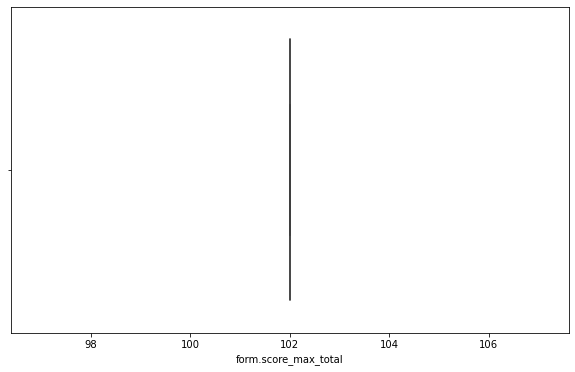

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(numerical_dataframe["form.score_max_total"])

/Users/Stephane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='form.score_total'>

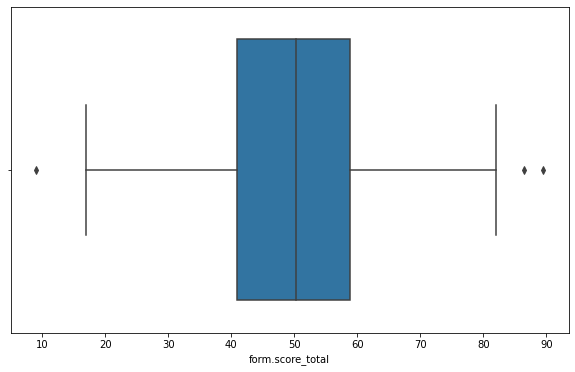

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(numerical_dataframe["form.score_total"])

In [53]:
#Fill in missing data points with the average value
numerical_dataframe.loc[(numerical_dataframe['form.score_total'].isnull() == True), 'form.score_total'] = numerical_dataframe['form.score_total'].mean()
numerical_dataframe.isnull().sum()

form.score_total        0
form.score_max_total    1
dtype: int64

In [54]:
#Fill in missing data points with the average value
numerical_dataframe.loc[(numerical_dataframe['form.score_max_total'].isnull() == True), 'form.score_max_total'] = numerical_dataframe['form.score_max_total'].mean()
numerical_dataframe.isnull().sum()

form.score_total        0
form.score_max_total    0
dtype: int64

In [55]:
numerical_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
form.score_total,125.0,49.846774,14.596616,9.0,41.0,50.0,58.5,89.5
form.score_max_total,125.0,102.000000,0.000000,102.0,102.0,102.0,102.0,102.0


<AxesSubplot:>

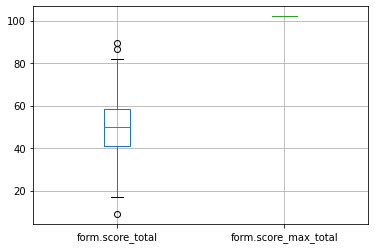

In [56]:
numerical_dataframe.boxplot()

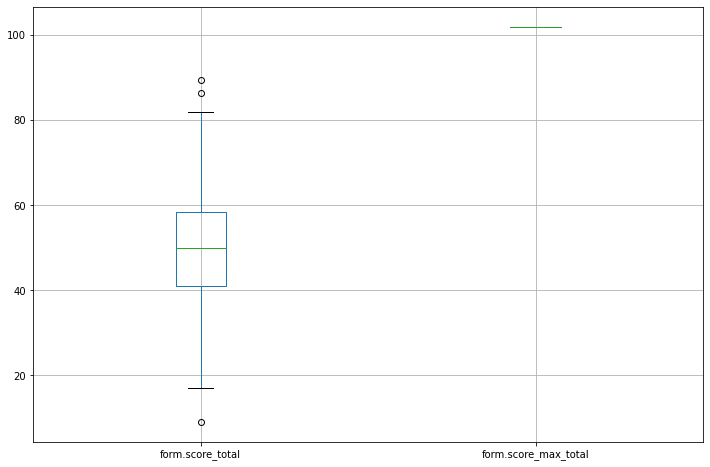

In [57]:
numerical_dataframe.boxplot(column=['form.score_total','form.score_max_total'],figsize=(12,8))
plt.show();

In [58]:
# The columns have different ranges and magnitudes due to which the box plot is skewed. 
#Algorithms which use Euclidean Distance measure (e.g. K-means, PCA) are sensitive to magnitudes. 
#Scaling can mitigate this by getting all the features to be weight equally

std_scaler = StandardScaler(copy=True,with_mean=True,with_std=True)

scaled_array= std_scaler.fit_transform(numerical_dataframe)

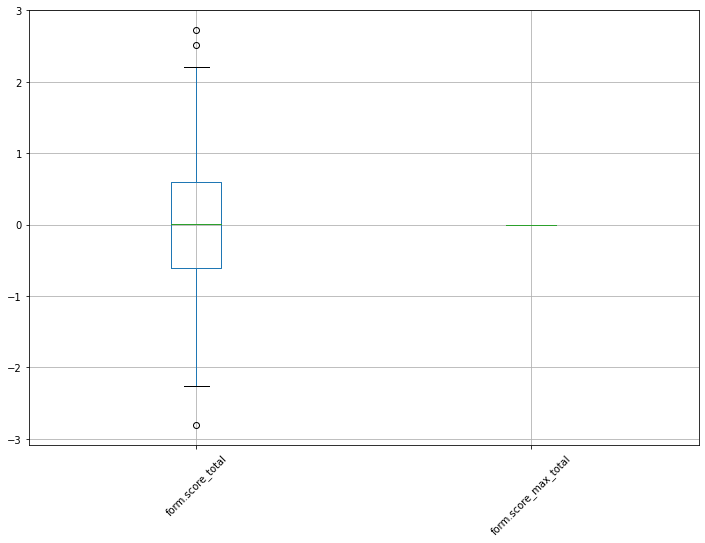

In [59]:
scaled_df = pd.DataFrame(scaled_array,columns=numerical_dataframe.columns)

scaled_df.boxplot(figsize=(12,8),rot=45)
plt.show();

In [60]:
scaled_df.head(10)

,form.score_total,form.score_max_total
0,-0.092637,0.0
1,-0.986839,0.0
2,0.388856,0.0
3,0.526425,0.0
4,0.354463,0.0
5,0.216894,0.0
6,-0.814877,0.0
7,1.076703,0.0
8,-2.259356,0.0
9,1.833335,0.0


In [61]:
# convert lat and long
categorical_dataframe.head()

,form.health_centre_information.facility_name,form.health_centre_information.location_information.region_province,form.health_centre_information.location_information.district,form.health_centre_information.location_information.chiefdom,form.health_centre_information.location_information.facility_location,form.health_centre_information.facility_type,form.health_centre_information.managing_authority,form.health_centre_information.setting,form.health_centre_information.outpatient_only,form.health_centre_information.capacity.number_consultation_rooms,...,form.ql_isolation_physical_distancing.score_isolation,form.grp_infection_prevention_and_control.ql_ppe.score_infection_prevention_and_control_ppe,form.grp_infection_prevention_and_control.ql_ppe_plan.score_infection_prevention_and_control_ppe_plan,form.grp_infection_prevention_and_control.ql_waste_collection_and_disposal.score_infection_prevention_and_control_waste_collection_and_disposal,form.grp_infection_prevention_and_control.ql_water_sanitation_and_hygiene.score_infection_prevention_and_control_water_sanitation_and_hygiene,form.grp_infection_prevention_and_control.ql_disinfection_and_sterilization.score_infection_prevention_and_control_disinfection_and_sterilization,form.grp_infection_prevention_and_control.score_infection_prevention_and_control,form.question1.score_logistics_patient_and_sample_transfer,Latitude,Longitude
0,William hospital,Southern,Pujehun,New York,Jasonfort,community_health_post,government_public,peri_urban,yes,1,...,2,3,1,1.5,4,1,10.5,19.5,60.234598,-90.157892
1,Kathryn Hospital/CHC,Southern,Bo,Arizona,West Jamesshire,community_health_post,government_public,rural,yes,1,...,0.5,3,0,1,1.5,0,5.5,21,21.2454855,-107.509120
2,Jessica Hospital,Southern,Bo,New Mexico,Robertsside,community_health_post,government_public,rural,yes,2,...,1,5.5,1,1.5,2,0,10,33.5,-0.178657,-9.190029
3,Lauren CHC,Southern,Bonthe,Missouri,Port Christopher,mch_post,government_public,peri_urban,no,1,...,2,5.5,0.5,0,4,2,12,34.5,35.856989,-87.512790
4,Tammy CHC,Southern,Bonthe,Virginia,Reneeton,community_health_post,government_public,peri_urban,no,3,...,3,3,0.5,1.5,4,3,12,29.5,54.7148835,150.744813


In [62]:
categorical_dataframe.to_csv('category_data.csv', index=False)

In [63]:
coordinates_df = categorical_dataframe.iloc[:,164:166]
coordinates_df.head(2)

,Latitude,Longitude
0,60.234598,-90.157892
1,21.2454855,-107.509120


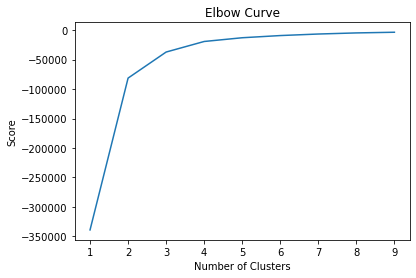

In [64]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = coordinates_df[['Latitude']]
X_axis = coordinates_df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(coordinates_df[coordinates_df.columns[1:3]]) # Compute k-means clustering.
coordinates_df['cluster_label'] = kmeans.fit_predict(coordinates_df[coordinates_df.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(coordinates_df[coordinates_df.columns[1:3]]) # Labels of each point
coordinates_df.head(10)

<ipython-input-66-55f56d04986d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_df['cluster_label'] = kmeans.fit_predict(coordinates_df[coordinates_df.columns[1:3]])


,Latitude,Longitude,cluster_label
0,60.234598,-90.157892,2
1,21.2454855,-107.509120,2
2,-0.178657,-9.190029,0
3,35.856989,-87.512790,2
4,54.7148835,150.744813,1
6,61.8040035,28.191714,0
7,86.9708915,173.527045,1
8,77.8973365,70.112618,1
9,-24.700264,79.460077,1
10,21.108351,-60.068170,2


In [ ]:
# All data sets: coordinates_df, scaled_df, slice_cont_four, slice_cont_three, slice_cont_two, slice_cont_one